# Calculating confidence in a metric
### Leyla Tarhan
### 6/2022

Code to think through how confident we should be that a metric that we've measured reflects the true metric that we would be able to measure with infinite data.

In [1]:
# set up libraries
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# define some case-specific variables
# (change these values for your specific metric)

# what are your prior beliefs?
strength = 10; # think of this as people you're acting as though you've already seen when forming your prior -- lower numbers = weaker/wider priors; range = (0, infinity)
priorProb = .1; # your hypothesis about the true probability that someone will interact with the feature; range = (0, 1)

# what are your observed data?
obs_y = 17; # number of users who interacted with the feature (or whatever)
obs_n = 70; # number of users who *didn't* interact with the feature

# what's your target metric? (e.g., your OKR)
refPoint = .1 # e.g., .1 = 10% of users interacting with the feature


Text(0.5, 1.0, 'prior distribution')

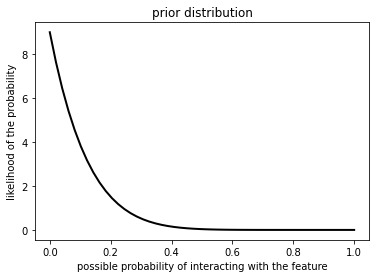

In [3]:
# set up a prior distribution

# calculate the prior based on the parameters above:
prior_y = priorProb * strength # number of users you should expect to interact with the feature, given your priors
prior_n = strength - prior_y # number of users you should expect to *not* interact with the feature, given your priors
priorDistribution = beta(prior_y, prior_n)

# plot the prior:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1)
ax.plot(x, priorDistribution.pdf(x), 'k-', lw=2)
plt.xlabel('possible probability of interacting with the feature')
plt.ylabel('likelihood of the probability')
plt.title('prior distribution')
# y ~ relative likelihood of the possible probabilities
# x = possible probabilities that someone uses the feature


Text(0.5, 1.0, 'posterior distribution')

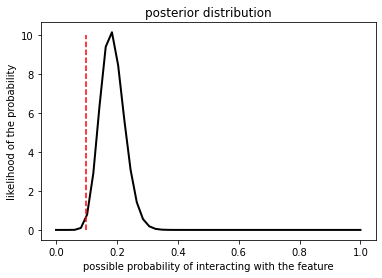

In [4]:
# calculate a posterior distribution, based on the data
post_y = prior_y + obs_y; # update your prior based on what you observed
post_n = prior_n + obs_n;
postDistribution = beta(post_y, post_n)

# plot the posterior:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1)
ax.plot(x, postDistribution.pdf(x), 'k-', lw=2)
ax.plot([.1, .1], [0, 10], 'r--') # add a reference line to mark your target metric
plt.xlabel('possible probability of interacting with the feature')
plt.ylabel('likelihood of the probability')
plt.title('posterior distribution')



In [5]:
# based on the posterior, calculate probability that the *true* interaction probability is >= some reference point
prParam = 1 - postDistribution.cdf(refPoint)
print("probability that metric is >= " + str(refPoint) + " = " + str(round(prParam, 2)))



probability that metric is >= 0.1 = 0.99


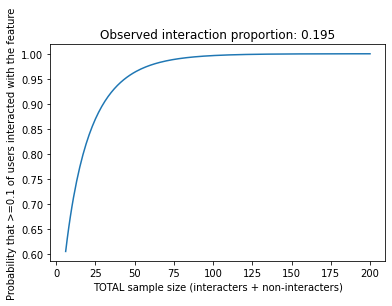

Holding the following variables constant:
observed ratio = 0.195
prior prob. of interaction = 0.1
prior strength = 10


In [7]:
# how would your confidence change if you had the same ratio of engaged:didn't engage, the same prior, but more data?

ns = np.arange(1, 201) # the *total* sample sizes you'll consider (engaged + didn't engage -- setting upper limit to 200 for now)
probs = np.zeros(len(ns)) # initialize an array to store probability that exceeded the reference mark at each simulated sample size
obs_ratio = obs_y/(obs_y + obs_n) # proportion of users who engage with the feature, based on data we've actually observed at this point

# loop through the sample sizes
for n in ns:
    # if we keep this ratio constant, with this hypothetical total N how many users would engage / not engage?
    curr_y = n*obs_ratio
    curr_n = n - curr_y
    
    # calculate the posterior based on this hypothetical observation
    curr_post_y = prior_y + curr_y;
    curr_post_n = prior_n + curr_n;
    curr_postDistribution = beta(curr_post_y, curr_post_n)
    
    # from this posterior, calculate the probability that we achieved the reference metric
    idx = np.where(ns == n)[0][0]
    if curr_y <1 or curr_y <1:
        # not enough data to get a whole user -- shouldn't even calculate probability bc this isn't a possible observation
        probs[idx] = float('nan')
    else:        
        probs[idx] = 1 - curr_postDistribution.cdf(refPoint)
    
# plot the curve
plt.plot(ns, probs)
plt.xlabel('TOTAL sample size (interacters + non-interacters)')
plt.ylabel('Probability that >=' + str(refPoint) + ' of users interacted with the feature')
plt.title('Observed interaction proportion: ' + str(round(obs_ratio, 3)))
plt.show()

print('Holding the following variables constant:\n' + 'observed ratio = ' + str(round(obs_ratio, 3)) + '\n' 
        + 'prior prob. of interaction = ' + str(priorProb) + '\n'
        + 'prior strength = ' + str(strength))
    
    

